### POSTGRESQL CONNECTION


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib as plt


In [38]:
#pip install matplotlib


  Using cached matplotlib-3.5.1-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.29.1-py3-none-any.whl (895 kB)
  Using cached Pillow-9.0.1-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)


In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb1",
                                           user = "postgres",
                                           password = "12345",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


In [34]:
cur = con.cursor()
# select_stmt =   "SELECT  s.division , SUM(CAST(t.total_price AS DOUBLE PRECISION))"\
#                 "FROM ecomdb_star_schema.fact_data t"\
#                 "JOIN ecomdb_star_schema.store_dim s ON s.store_key = t.store_key"\
#                 "JOIN ecomdb_star_schema.time_dim time ON  time.time_key = t.time_key"\
#                 "WHERE CAST(time.month AS INTEGER)=12"\
#                 "GROUP BY s.division"\
#                 "ORDER BY s.division"

# select_stmt = "SELECT  s.division , SUM(CAST(t.total_price AS DOUBLE PRECISION)) FROM ecomdb_star_schema.fact_data t JOIN ecomdb_star_schema.store_dim s ON s.store_key = t.store_key JOIN ecomdb_star_schema.time_dim time ON  time.time_key = t.time_key WHERE CAST(time.month AS INTEGER)=12  GROUP BY s.division ORDER BY s.division"

select_stmt = "SELECT  s.division , SUM(CAST(t.total_price AS DOUBLE PRECISION))"\
" FROM ecomdb_star_schema.fact_data t "\
" JOIN ecomdb_star_schema.store_dim s ON s.store_key = t.store_key "\
" JOIN ecomdb_star_schema.time_dim time ON  time.time_key = t.time_key "\
" WHERE CAST(time.month AS INTEGER)=12 "\
"  GROUP BY s.division "\
" ORDER BY s.division"


cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', 638101.0),
 ('CHITTAGONG', 1665138.0),
 ('DHAKA', 3440676.25),
 ('KHULNA', 952049.75),
 ('RAJSHAHI', 1041201.25),
 ('RANGPUR', 721057.5),
 ('SYLHET', 465256.75)]

In [35]:
df = pd.DataFrame(list(records), columns=['division', 'sales'])

In [36]:
df

,division,sales
0,BARISAL,638101.00
1,CHITTAGONG,1665138.00
2,DHAKA,3440676.25
3,KHULNA,952049.75
4,RAJSHAHI,1041201.25
5,RANGPUR,721057.50
6,SYLHET,465256.75


In [39]:
df.dtypes

division     object
sales       float64
dtype: object

In [40]:
import matplotlib.pyplot as plt

In [42]:
df = df.set_index(['division'])

<AxesSubplot:ylabel='sales'>

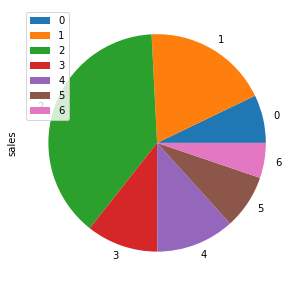

In [53]:
df.plot.pie(y='sales',figsize=(5, 5))

District Base Sales Information

In [54]:
cur = con.cursor()

select_stmt ="SELECT  s.district , SUM(CAST(t.total_price AS DOUBLE PRECISION)) FROM ecomdb_star_schema.fact_data t JOIN ecomdb_star_schema.store_dim s ON s.store_key = t.store_key JOIN ecomdb_star_schema.time_dim time ON  time.time_key = t.time_key WHERE CAST(time.month AS INTEGER)=12 GROUP BY s.district ORDER BY s.district"
                
cur.execute(select_stmt)

In [55]:
records = cur.fetchall()
records

[('BAGERHAT', 110194.5),
 ('BANDARBAN', 81886.5),
 ('BARGUNA', 68845.5),
 ('BARISAL', 242369.5),
 ('BHOLA', 84700.75),
 ('BOGRA', 147783.75),
 ('BRAHMANBARIA', 117190.0),
 ('CHANDPUR', 95107.0),
 ('CHAPAI NABABGANJ', 60555.0),
 ('CHITTAGONG', 613380.0),
 ('CHUADANGA', 50061.25),
 ('COMILLA', 192892.25),
 ("COX'S BAZAR", 95943.75),
 ('DHAKA', 1999370.75),
 ('DINAJPUR', 166874.75),
 ('FARIDPUR', 109640.25),
 ('FENI', 75729.0),
 ('GAIBANDHA', 88345.25),
 ('GAZIPUR', 67368.0),
 ('GOPALGANJ', 55783.25),
 ('HABIGANJ', 98262.0),
 ('JAMALPUR', 82109.25),
 ('JESSORE', 92805.75),
 ('JHALOKATI', 51530.75),
 ('JHENAIDAH', 76625.0),
 ('JOYPURHAT', 64929.0),
 ('KHAGRACHHARI', 97105.5),
 ('KHULNA', 336207.0),
 ('KISHOREGONJ', 166585.25),
 ('KURIGRAM', 108093.5),
 ('KUSHTIA', 77400.25),
 ('LAKSHMIPUR', 64652.25),
 ('LALMONIRHAT', 69586.0),
 ('MADARIPUR', 50924.75),
 ('MAGURA', 47361.75),
 ('MANIKGANJ', 84279.25),
 ('MAULVIBAZAR', 90931.0),
 ('MEHERPUR', 38495.25),
 ('MUNSHIGANJ', 72688.25),
 ('MYMENSI

In [56]:
df = pd.DataFrame(list(records), columns=['district', 'sales'])

In [57]:
df = df.set_index(['district'])


<AxesSubplot:ylabel='sales'>

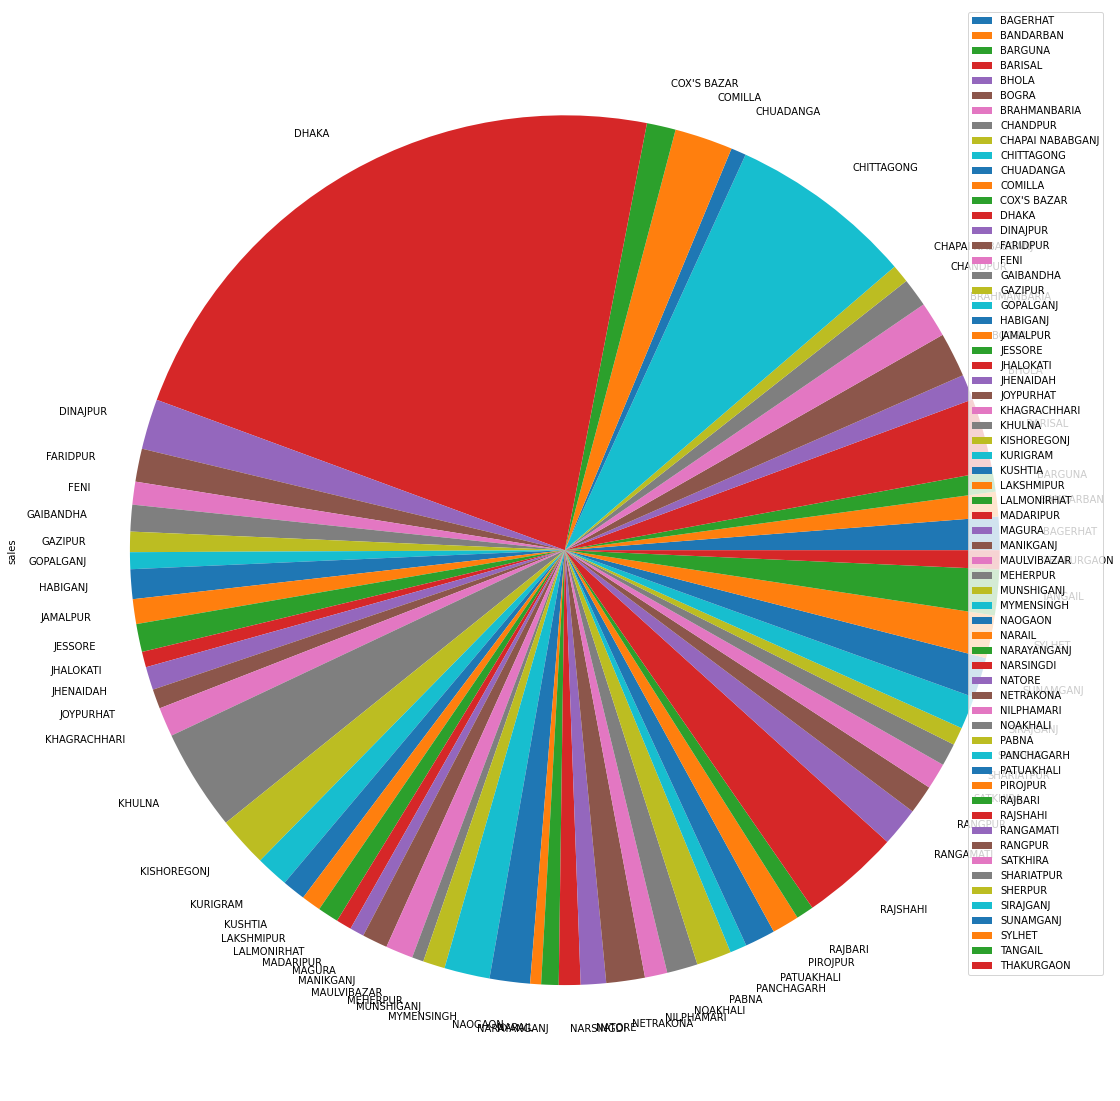

In [60]:
df.plot.pie(y='sales',figsize=(20,20))

Q2 Transactional wise total-sales

In [12]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query2 =" select t.trans_type, sum(cast(fact.total_price as double precision)) "\
" from ecomdb_star_schema.fact_data fact "\
"join ecomdb_star_schema.trans_dim t on t.payment_key = fact.payment_key "\
"GROUP BY t.trans_type "
cur.execute(query2)
result = cur.fetchall()
result 


successfully connected to database


[('card', 94583038.5), ('cash', 2708515.75), ('mobile', 8109881.5)]

In [19]:
df = pd.DataFrame(list(result), columns=['transaction-types', 'sales'])
df

,transaction-types,sales
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50


<AxesSubplot:ylabel='sales'>

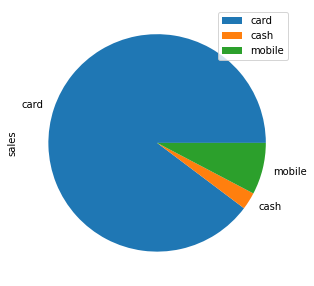

In [20]:
df = df.set_index(['transaction-types'])
df.plot.pie(y='sales',figsize=(5, 5))

Q3

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query3 = "select sum(cast(fact.total_price as double PRECISION)) "\
"from ecomdb_star_schema.fact_data fact "\
"join ecomdb_star_schema.store_dim s on s.store_key = fact.store_key "\
"where s.division = 'BARISAL' "
cur.execute(query3)
result = cur.fetchall()
result

successfully connected to database


[(7520343.75,)]

Q4

In [9]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query4 = "select sum(cast(fact.total_price as double precision)) "\
"from ecomdb_star_schema.fact_data fact " \
"join ecomdb_star_schema.time_dim time on time.time_key=fact.time_key "\
"where (cast(time.year as integer))=2015 "

cur.execute(query4)
result = cur.fetchall()
result

successfully connected to database


[(15095720.25,)]

Q5

In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query5= "select sum(cast(fact.total_price as double precision)) "\
"from ecomdb_star_schema.fact_data fact "\
"join ecomdb_star_schema.store_dim s on s.store_key = fact.store_key "\
"join ecomdb_star_schema.time_dim time on time.time_key=fact.time_key "\
"where  s.division = 'BARISAL' and (cast(time.year as integer))=2015 "

cur.execute(query5)
result = cur.fetchall()
result


successfully connected to database


[(1076902.75,)]

q6

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
query6= "select store.store_key, item.item_name , sum(cast(fact.quantity as integer))as Quantity "\
"from ecomdb_star_schema.fact_data fact "\
"join ecomdb_star_schema.store_dim store on store.store_key=fact.store_key "\
"join ecomdb_star_schema.item_dim item on item.item_key = fact.item_key "\
"group by store.store_key, item.item_name "\
"order by store.store_key,quantity desc "

cur.execute(query6)
result = cur.fetchall()
result 

successfully connected to database


[('S0001', 'Pepsi - 12 oz cans', 92),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', 90),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', 78),
 ('S0001', 'Waterloo Sparkling Lime 12oz', 70),
 ('S0001', 'Njoy Sugar Canister 22 oz', 69),
 ('S0001', 'Vita Coconut Water 10oz ', 68),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', 67),
 ('S0001', 'Sprite - 12 oz cans', 64),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', 63),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', 62),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', 61),
 ('S0001', 'A&W Root Beer - 12 oz cans', 60),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', 60),
 ('S0001', 'Dark Chocolate Mint Patties', 60),
 ('S0001', 'Large Trash Bags Black 33 gal', 59),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', 59),
 ('S0001', 'Kellogg Fun Mix Cheez it, Prngls, Fam Amos', 58),
 ('S0001', 'Quaker Instant Oatmeal Maple Brn Sugar', 57),
 ('S0001', 'Frito Bold Flavors Variety', 56),
 ('S0001', 'Keebler Cookie & Cr